# First script

In [1]:
# Importing

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import salishsea_tools.viz_tools as sa_vi
import cmocean.cm as cm


(array([6.761778e+06, 6.420360e+05, 8.444010e+05, 2.515910e+05,
        5.489800e+04, 8.973000e+03, 4.509000e+03, 1.334000e+03,
        5.680000e+02, 7.200000e+01]),
 array([0.        , 0.00484669, 0.00969339, 0.01454008, 0.01938677,
        0.02423347, 0.02908016, 0.03392686, 0.03877355, 0.04362024,
        0.04846694]),
 <BarContainer object of 10 artists>)

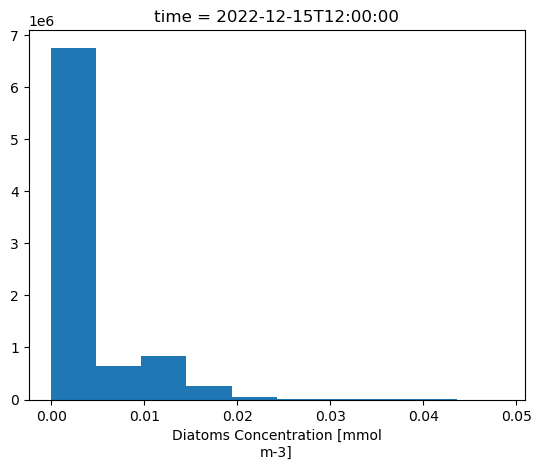

In [142]:
# Dataset preparation

ds = xr.open_dataset('/data/ibougoudis/MOAD/SalishSeaCast_1m_ptrc_T_20221201_20221231.nc')
diatoms = ds.diatoms[0,0]
# # open the mesh mask
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
mask = mesh.tmask.to_numpy()

diatoms_masked = diatoms.where(mask[0,0]==1)

ds.diatoms[:39].plot()


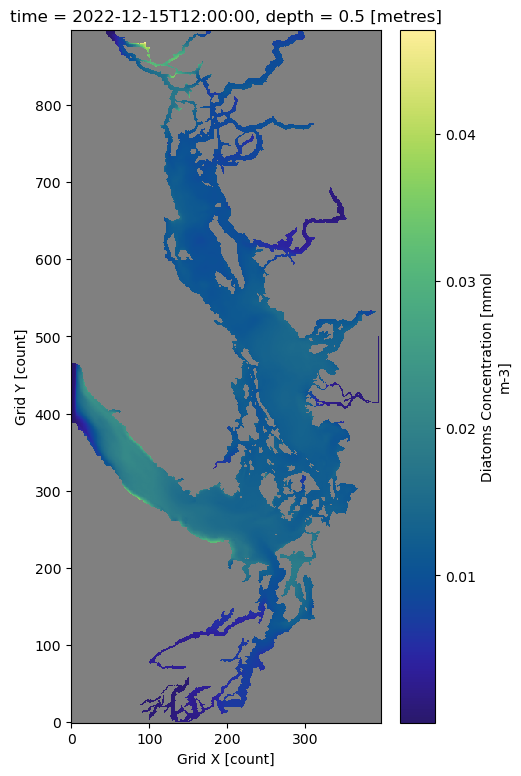

In [128]:
cmap = cm.haline
cmap.set_bad('gray')

fig, ax = plt.subplots(1, 1, figsize=(5, 9))
diatoms_masked.plot(ax=ax, cmap=cmap)


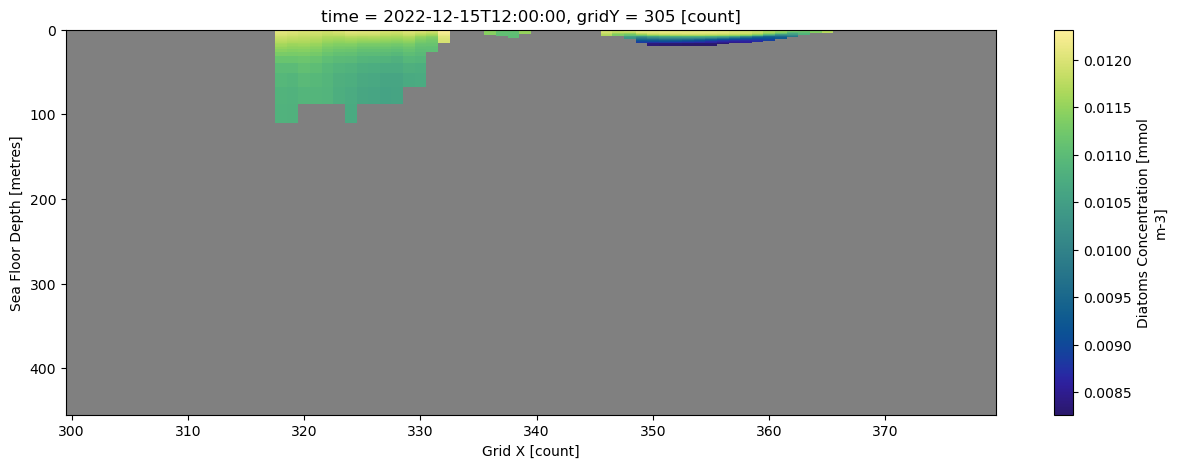

In [131]:
diatoms_masked2 = ds['diatoms'].where(mask==1)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
cmap = cm.haline
cmap.set_bad('gray')
diatoms_masked2[0,:,305,300:380].plot(ax=ax, cmap=cmap)
ax.invert_yaxis()
